In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

steps = np.random.standard_normal(1000) #평균이 0이고 분산이 1인 정규분포에서 1000개의 난수를 생성한다.
steps[0] = 0 # 초기화

random_walk = np.cumsum(steps)

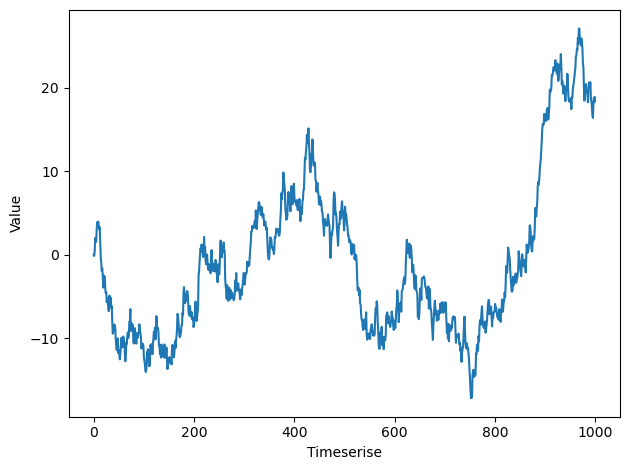

In [2]:
fig, ax = plt.subplots()

ax.plot(random_walk)
ax.set_xlabel('Timeserise')
ax.set_ylabel('Value')

plt.tight_layout()

In [3]:
 from statsmodels.tsa.stattools import adfuller

In [4]:
ADF_result = adfuller(random_walk)

print(f"ADF Statistic: {ADF_result[0]}")
print(f"p-value: {ADF_result[1]}")

ADF Statistic: -0.9659524876918751
p-value: 0.7654789696692581


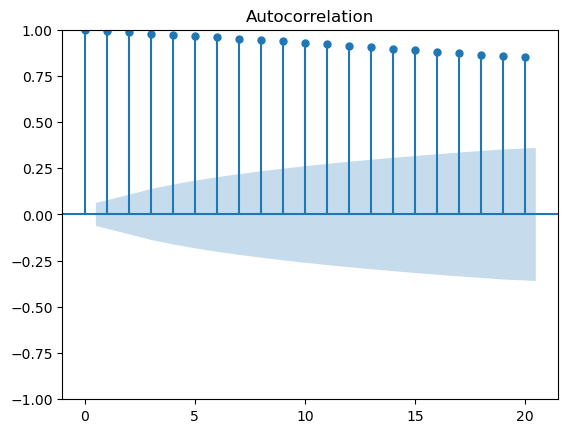

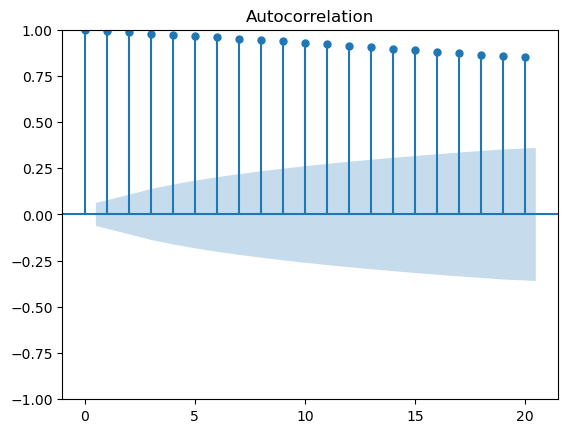

In [5]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(random_walk, lags = 20)

In [6]:
doff_random_walk = np.diff(random_walk, n=1)

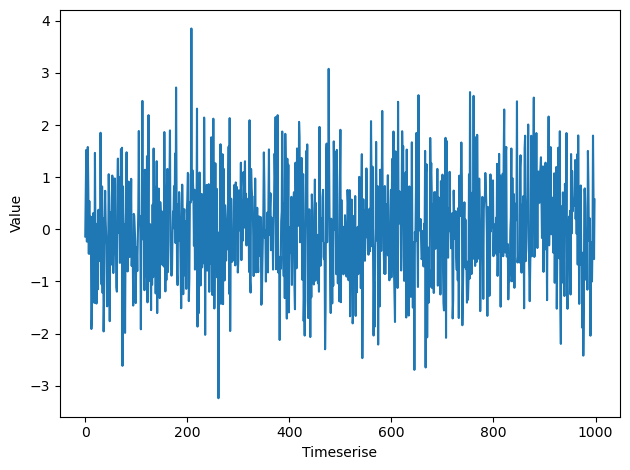

In [7]:
fig, ax = plt.subplots()

ax.plot(doff_random_walk)
ax.set_xlabel('Timeserise')
ax.set_ylabel('Value')

plt.tight_layout()

In [8]:
ADF_result = adfuller(doff_random_walk)

print(f"ADF Statistic: {ADF_result[0]}")
print(f"p-value: {ADF_result[1]}")

ADF Statistic: -31.789310857560615
p-value: 0.0


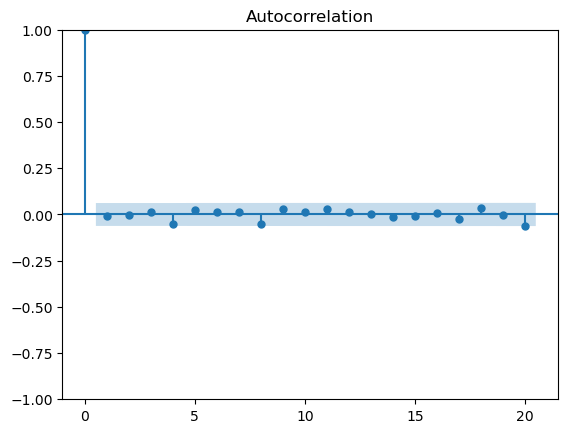

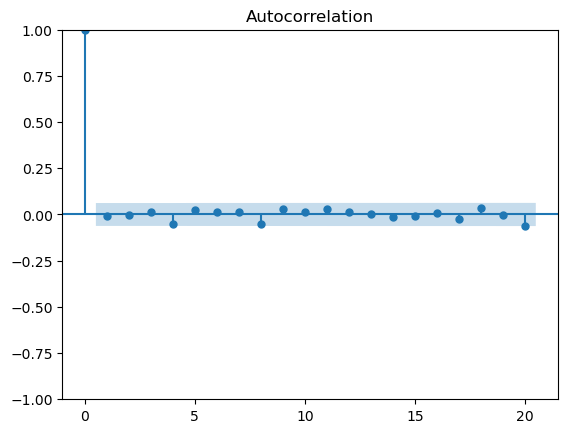

In [9]:
plot_acf(doff_random_walk, lags = 20)

In [10]:
import pandas as pd
df = pd.read_csv('../다운로드/GOOGL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-27,1292.000000,1294.099976,1265.060059,1270.859985,1270.859985,2209300
1,2020-04-28,1283.199951,1284.760010,1230.380005,1232.589966,1232.589966,4035000
2,2020-04-29,1345.000000,1360.150024,1326.729980,1342.180054,1342.180054,5417900
3,2020-04-30,1331.359985,1350.000000,1321.500000,1346.699951,1346.699951,2792100
4,2020-05-01,1324.089966,1351.430054,1309.660034,1317.319946,1317.319946,2443600


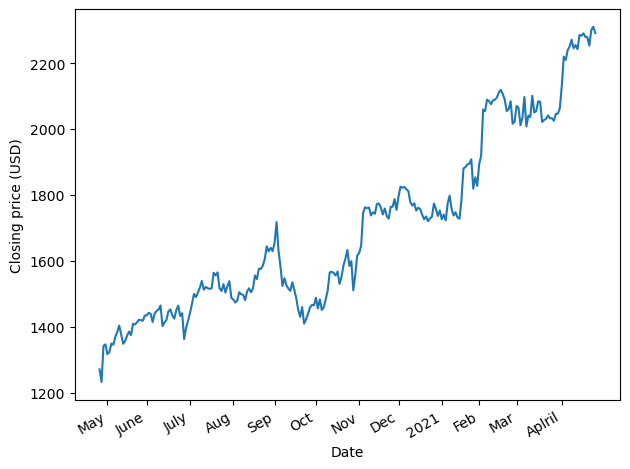

In [11]:
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'])
ax.set_xlabel('Date')
ax.set_ylabel('Closing price (USD)')

plt.xticks(
    [4, 24, 46, 68, 89, 110, 132, 152, 174, 193, 212, 235],
    ['May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '2021', 'Feb', 'Mar', 'Aplril']
)
fig.autofmt_xdate()
plt.tight_layout()

In [12]:
GOOGL_ADF_result = adfuller(df['Close'])
print(f'ADF Statistic: {GOOGL_ADF_result[0]}')
print(f'p-value: {GOOGL_ADF_result[1]}')

ADF Statistic: 0.1602504866477145
p-value: 0.9699419435913058


In [13]:
diff_close = np.diff(df['Close'], n=1)

In [14]:
GOOGL_diff_ADF_result = adfuller(diff_close)

print(f'ADF Statistic: {GOOGL_diff_ADF_result[0]}')
print(f'p-value: {GOOGL_diff_ADF_result[1]}') # 0.00000539

ADF Statistic: -5.303439704295221
p-value: 5.386530961454919e-06


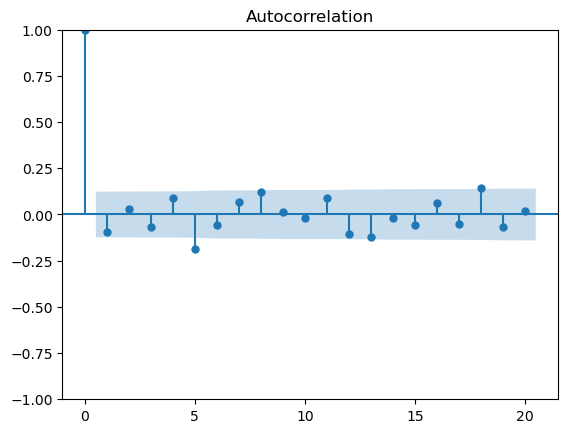

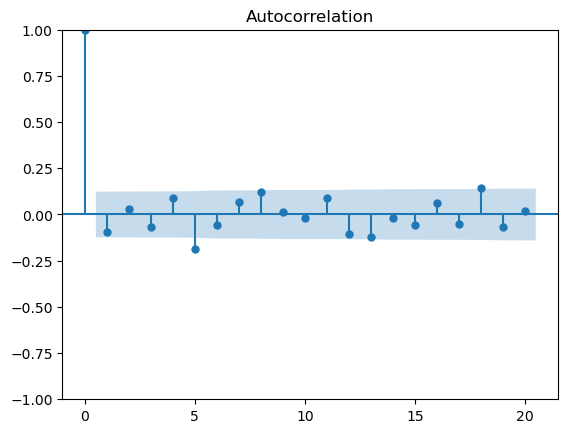

In [15]:
plot_acf(diff_close, lags=20)

In [16]:
#확률보행 예측하기
df = pd.DataFrame({'value':random_walk})
train = df[:800]
test = df[800:]
df.head()

,value
0,0.000000
1,-0.138264
2,0.509424
3,2.032454
4,1.798301


In [17]:
mean = np.mean(train['value'])
test.loc[:, 'pred_mean'] = mean
test.head()

/tmp/ipykernel_17356/3676890479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_mean'] = mean


,value,pred_mean
800,-5.876664,-3.677206
801,-6.392708,-3.677206
802,-6.296588,-3.677206
803,-6.758863,-3.677206
804,-7.193359,-3.677206


In [18]:
last_value = train.iloc[-1].value
test.loc[:, 'pred_last'] = last_value
test.head()

/tmp/ipykernel_17356/2342727651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_last'] = last_value


,value,pred_mean,pred_last
800,-5.876664,-3.677206,-6.814947
801,-6.392708,-3.677206,-6.814947
802,-6.296588,-3.677206,-6.814947
803,-6.758863,-3.677206,-6.814947
804,-7.193359,-3.677206,-6.814947


In [19]:
#표류
deltaX = 800-1
deltaY = last_value - 0

drift = deltaY / deltaX
print(drift)

-0.008529346056640632


In [20]:
x_vals = np.arange(801, 1001, 1)
pred_drift = drift * x_vals
test.loc[:, 'pred_drift'] = pred_drift
test.head()

/tmp/ipykernel_17356/3562704513.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_drift'] = pred_drift


,value,pred_mean,pred_last,pred_drift
800,-5.876664,-3.677206,-6.814947,-6.832006
801,-6.392708,-3.677206,-6.814947,-6.840536
802,-6.296588,-3.677206,-6.814947,-6.849065
803,-6.758863,-3.677206,-6.814947,-6.857594
804,-7.193359,-3.677206,-6.814947,-6.866124


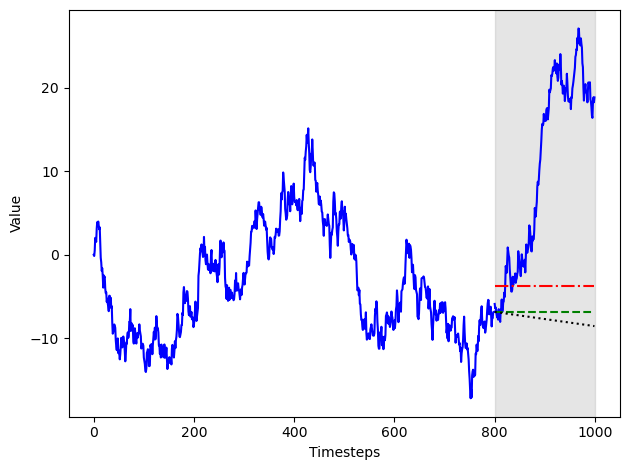

In [21]:
fig, ax = plt.subplots()

ax.plot(train.value, 'b-')
ax.plot(test['value'], 'b-')
ax.plot(test['pred_mean'], 'r-.', label='Mean')
ax.plot(test['pred_last'], 'g--', label='Last value')
ax.plot(test['pred_drift'], 'k:', label='Drift')

ax.axvspan(800, 1000, color = '#808080', alpha=0.2)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()

In [22]:
#MSE
from sklearn.metrics import mean_squared_error

mse_mean = mean_squared_error(test['value'], test['pred_mean'])
mse_last = mean_squared_error(test['value'], test['pred_last'])
mse_drift = mean_squared_error(test['value'], test['pred_drift'])

print(mse_mean, mse_last, mse_drift)

326.50277395297474 425.1726033055617 466.2172769077409


In [24]:
df_shift = df.shift(periods=1)
df_shift.head()

,value
0,NaN
1,0.000000
2,-0.138264
3,0.509424
4,2.032454


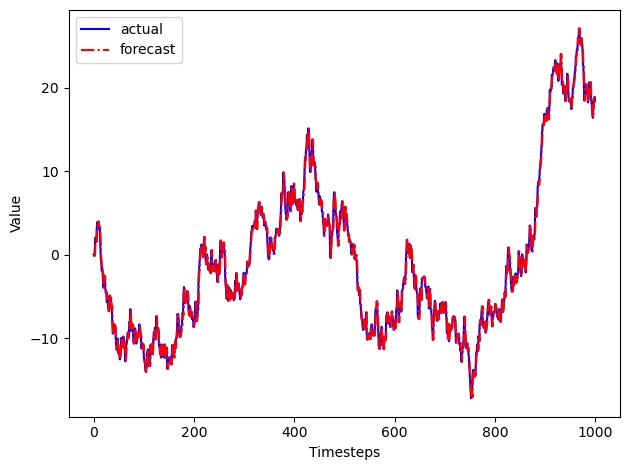

In [26]:
fig, ax = plt.subplots()

ax.plot(df, 'b-', label='actual')
ax.plot(df_shift, 'r-.', label = 'forecast')

ax.legend(loc=2)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()

In [27]:
mse_one_step = mean_squared_error(test['value'], df_shift[800:])
print(mse_one_step)

0.9256876651440581
